In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [67]:
with open('prediction.csv', 'r', encoding='utf-8', errors='replace') as file:
    data = pd.read_csv(file, delimiter=';')

In [69]:
data.head(10)

,Auteur,Date,Commentaire,Note,score,prediction,Sentiment
0,JULIE,11/12/2024,agreables a porter et bon amorti,5,0.598047,4,Positif
1,PIERRETTE,11/12/2024,bon produit,5,0.577293,4,Positif
2,VANESSA,10/12/2024,bon rapport qualite prix,5,0.599083,4,Positif
3,JEAN CHARLES,10/12/2024,tiens bien au pied,5,0.470387,4,Positif
4,BARBARA,10/12/2024,utilisee pour la salle de sport et sur tapis d...,5,0.492338,4,Positif
5,VIRGINIE,09/12/2024,semelle dure materiaux passables pour la trans...,3,0.439890,3,Neutre
6,NADINE,10/12/2024,achetees pour le travail debout h par jour par...,5,0.799806,5,Tres positif
7,Florence,09/12/2024,sa fait longtemps que je prend ce modele et j ...,5,0.735488,5,Tres positif
8,Margaux,09/12/2024,chaussures pas cher et qui fait le taf pour co...,5,0.469978,5,Tres positif
9,Pascale,08/12/2024,non seulement de glisser sur sol mouille la se...,3,0.544036,2,Negatif


In [71]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

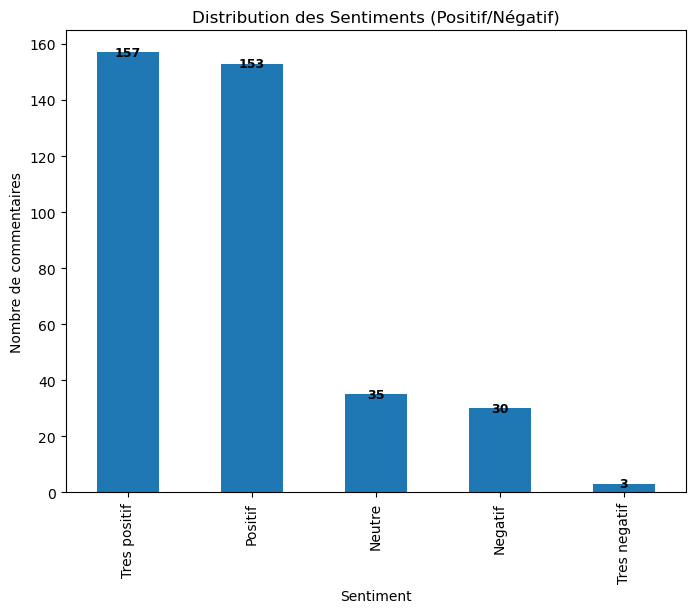

In [135]:
#Distribution des sentiments
plt.figure(figsize=(8, 6))
ax = df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Distribution des Sentiments (Positif/Négatif)')
plt.xlabel('Sentiment')
plt.ylabel('Nombre de commentaires')
 
# Ajoute des étiquettes
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', fontweight='bold')
 
plt.show()

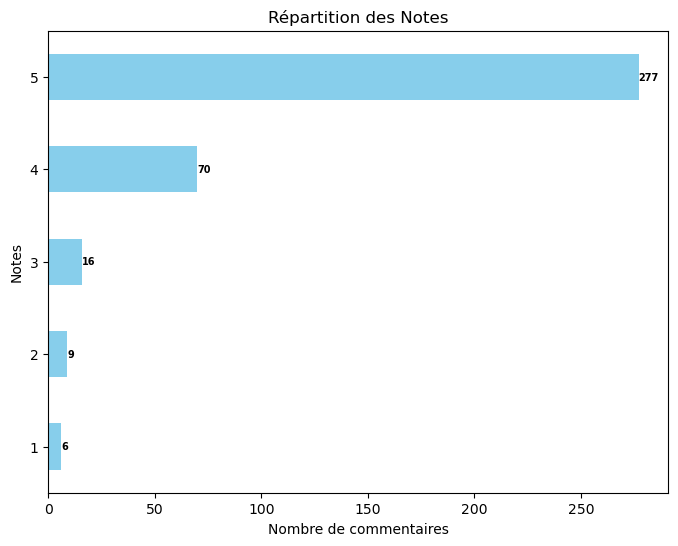

In [139]:
#Répartition des notes

# Répartition des notes avec étiquettes
plt.figure(figsize=(8, 6))
notes_counts = data['Note'].value_counts().sort_index()
bars = notes_counts.plot(kind='barh', color='skyblue')

plt.title('Répartition des Notes')
plt.xlabel('Nombre de commentaires')
plt.ylabel('Notes')

# Ajoute des étiquettes 
for index, value in enumerate(notes_counts):
    plt.text(value, index, str(value), va='center', color='black', fontweight='bold', fontsize=7)

plt.show()



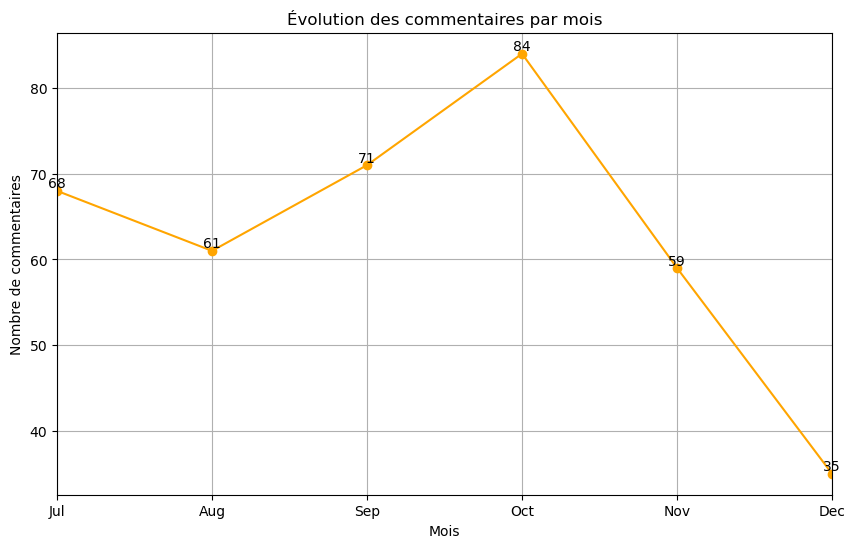

In [160]:
# Evolution des commentaires par mois
monthly_counts = data.set_index('Date').resample('ME').size()

plt.figure(figsize=(10, 6))
ax = monthly_counts.plot(kind='line', color='orange', marker='o', linestyle='-')

plt.title("Évolution des commentaires par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de commentaires")
plt.grid(True)


ax.set_xticks(monthly_counts.index)  
ax.set_xticklabels(monthly_counts.index.strftime('%b'))  

# Ajoute des étiquettes 
for i, txt in enumerate(monthly_counts):
    plt.text(monthly_counts.index[i], txt, str(txt), ha='center', va='bottom')

plt.show()


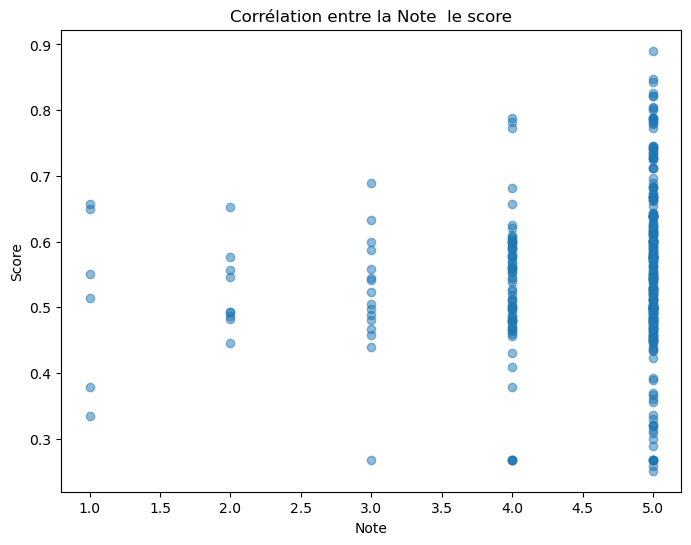

In [85]:
#Corrélation entre Note et Score
plt.figure(figsize=(8, 6))
plt.scatter(data['Note'], data['score'], alpha=0.5)
plt.title('Corrélation entre la Note et
le score')
plt.xlabel('Note')
plt.ylabel('Score')
plt.show()

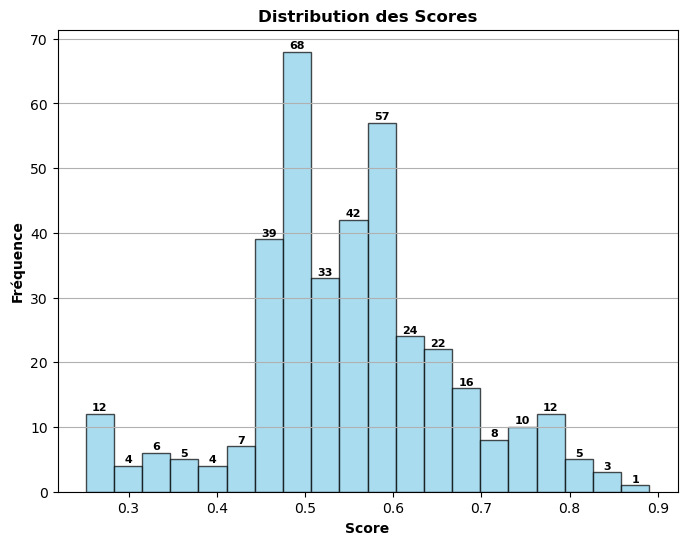

In [131]:
# Distribution des scores
plt.figure(figsize=(8, 6))

# Création de l'histogramme
n, bins, patches = plt.hist(data['score'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Ajout des étiquettes sur les barres
for i in range(len(patches)):
    plt.text(
        x=(bins[i] + bins[i+1]) / 2,  # Position horizontale (centre de la barre)
        y=n[i] + 0.5,  # Position verticale (au-dessus de la barre)
        s=f'{int(n[i])}',  # Texte de l'étiquette
        ha='center',  # Alignement horizontal
        fontsize=8,  # Taille de la police
        fontweight='bold'  # Texte en gras
    )

# Titres et labels
plt.title('Distribution des Scores', fontweight='bold')
plt.xlabel('Score', fontweight='bold')
plt.ylabel('Fréquence', fontweight='bold')
plt.grid(axis='y')

plt.show()



Text(0, 0.5, 'Score')

<Figure size 1000x600 with 0 Axes>

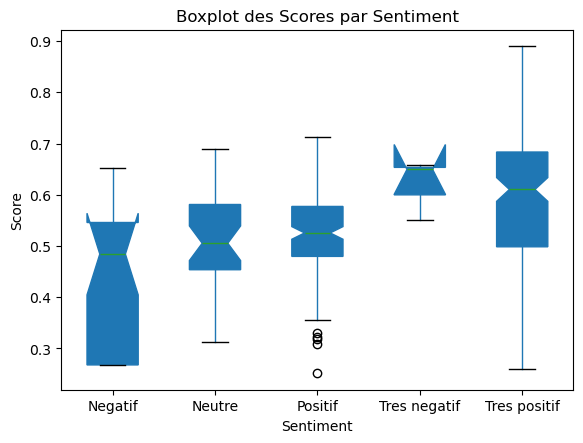

In [101]:
#Boxplot des scores par sentiment
plt.figure(figsize=(10, 6))
data.boxplot(column='score', by='Sentiment', grid=False, notch=True, patch_artist=True)
plt.title('Boxplot des Scores par Sentiment')
plt.suptitle('')  # Retirer le titre automatique
plt.xlabel('Sentiment')
plt.ylabel('Score')


<Figure size 1000x600 with 0 Axes>

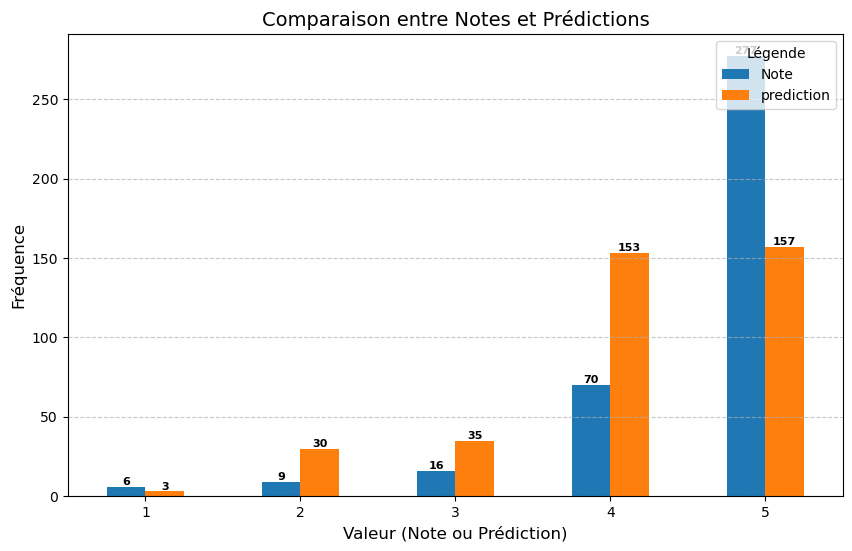

In [147]:
# Comparaison entre notes et prédictions
comparison = data[['Note', 'prediction']].melt(var_name='Type', value_name='Valeur')

plt.figure(figsize=(10, 6))
ax = comparison.groupby(['Type', 'Valeur']).size().unstack(level=0).plot(kind='bar', stacked=False, figsize=(10, 6))

plt.title('Comparaison entre Notes et Prédictions', fontsize=14)
plt.xlabel('Valeur (Note ou Prédiction)', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='Légende', loc='upper right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajoute des étiquettes 
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Éviter les barres vides
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f'{int(height)}',
                ha='center',
                va='bottom',
                fontweight='bold',
                fontsize=8
            )

plt.show()

